# DATA SCRUBBING

La limpieza de datos es esencial antes de su análisis, al igual que con muchas frutas que necesitan ser limpiadas y preparadas antes de comerlas.

En el campo del aprendizaje automático y la ciencia de datos, existen numerosas técnicas para limpiar los datos.

La limpieza implica refinar el conjunto de datos, modificando o eliminando datos incompletos, mal formateados, irrelevantes o duplicados. También puede requerir la conversión de datos de texto a valores numéricos y el rediseño de características. Este proceso suele ser la parte más laboriosa y exigente para los profesionales de datos.

#### Feature Selection

Para obtener los mejores resultados de tus datos, es importante identificar primero las variables más relevantes para tu hipótesis. En la práctica, esto implica ser selectivo sobre las variables que seleccionas para diseñar tu modelo.

En lugar de crear un gráfico de dispersión de cuatro dimensiones con cuatro características en el modelo, puede surgir la oportunidad de seleccionar dos características altamente relevantes y construir un gráfico de dos dimensiones que sea más fácil de interpretar. Además, preservar características que no se correlacionan fuertemente con el valor de resultado puede, de hecho, manipular y desviar la precisión del modelo. Considera el siguiente extracto de tabla descargado de kaggle.com que documenta lenguajes en peligro de extinción.

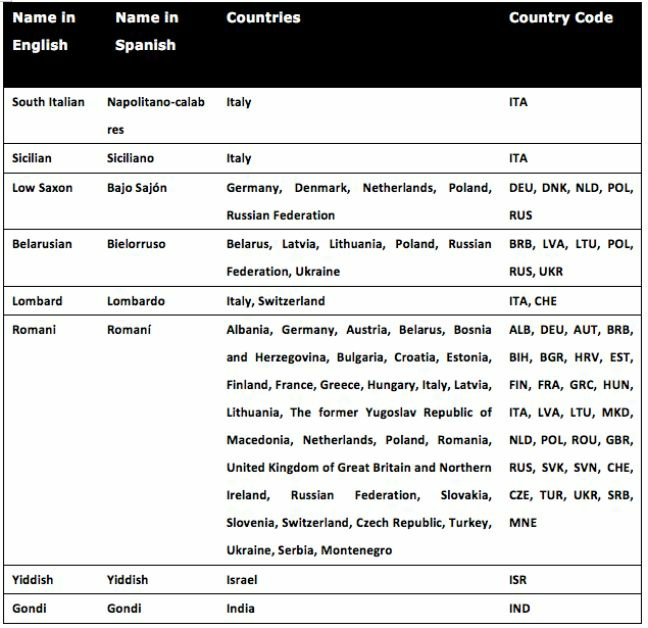

Database: https://www.kaggle.com/the-guardian/extinct-languages

Digamos que nuestro objetivo es identificar las variables que llevan a un idioma a estar en peligro de extinción. Basándonos en este objetivo, es poco probable que el "Nombre en español" de un idioma proporcione información relevante. Por lo tanto, podemos proceder a eliminar este vector (columna) del conjunto de datos. Esto ayudará a evitar complicaciones innecesarias y posibles inexactitudes, y también mejorará la velocidad de procesamiento general del modelo.

En segundo lugar, el conjunto de datos contiene información duplicada en forma de vectores separados para "Países" y "Código de país". Incluir ambos vectores no proporciona ninguna información adicional; por lo tanto, podemos optar por eliminar uno y conservar el otro.

Otro método para reducir el número de características es fusionar varias características en una sola. En la siguiente tabla, tenemos una lista de productos vendidos en una plataforma de comercio electrónico. El conjunto de datos comprende cuatro compradores y ocho productos. Este no es un tamaño de muestra grande de compradores y productos, en parte debido a las limitaciones espaciales del formato del libro. Una plataforma de comercio electrónico real tendría muchas más columnas con las que trabajar, pero continuemos con este ejemplo.

| |Protein Shake|Nike Sneakers|Addidas Boots|Fitbit|Powerade|Protein Bar|Fitness Watch|Vitamins|
|-|-------------|-------------|-------------|------|--------|-----------|-------------|--------|
|Buyer 1|1|1|0|1|0|5|1|0|
|Buyer 2|0|0|0|0|0|0|0|1|
|Buyer 3|3|0|1|0|5|0|0|0|
|Buyer 4|1|1|0|0|10|1|0|0|

Para analizar los datos de manera más eficiente, podemos reducir el número de columnas fusionando características similares en menos columnas. Por ejemplo, podemos eliminar los nombres individuales de los productos y reemplazar los ocho elementos de productos con un menor número de categorías o subtipos. Dado que todos los productos se encuentran bajo la categoría única de "fitness", ordenaremos por subtipo de producto y comprimiremos las columnas de ocho a tres. Las tres nuevas columnas de subtipo de producto creadas son "Alimentos saludables", "Ropa" y "Digital".

| |Health Food|Apparel|Digital|
|-|-----------|-------|-------|
|Buyer 1|6|1|2|
|Buyer 2|1|0|0|
|Buyer 3|8|1|0|
|Buyer 4|12|1|0|

En lugar de recomendar productos a los usuarios según otros productos individuales, las recomendaciones se basarán en las relaciones entre los subtipos de productos.

Sin embargo, este enfoque mantiene un alto nivel de relevancia de datos.

A los compradores se les recomendarán alimentos saludables cuando compren otros alimentos saludables o cuando compren ropa (dependiendo del nivel de correlación), y obviamente no libros de aprendizaje automático, a menos que resulte que haya una fuerte correlación. Pero lamentablemente, tal variable está fuera del alcance de este conjunto de datos.

Recuerde que la reducción de datos también es una decisión empresarial, y los propietarios de negocios en consulta con el equipo de ciencia de datos deberán considerar el equilibrio entre la conveniencia y la precisión general del modelo.

#### Row Compression

Además de la selección de características, también puede haber una oportunidad para reducir el número de filas y, por lo tanto, comprimir el total de puntos de datos.

Esto puede implicar fusionar dos o más filas en una. Por ejemplo, en el siguiente conjunto de datos, "Tiger" y "Lion" se pueden fusionar y renombrar como "Carnívoro".

Antes
|Animal|Meat Eater|Legs|Tail|Race Time|
|-------|----------|----|----|---------|
|Tiger  |Yes|4|Yes|2:01 mins|
|Lion   |Yes|4|Yes|2:05 mins|
|Tortoise|No|4|No |55:02 mins|

Despues
|Animal|Meat Eater|Legs|Tail|Race Time|
|-------|----------|----|----|---------|
|Carnivore  |Yes|4|Yes|2:03 mins|
|Tortoise|No|4|No |55:02 mins|

Sin embargo, al fusionar estas dos filas (Tigre y León), los valores de las características de ambas filas también deben ser agregados y registrados en una sola fila. En este caso, es viable fusionar las dos filas porque ambas poseen los mismos valores categóricos para todas las características excepto y (Tiempo de Carrera), que puede ser agregado. El tiempo de carrera del Tigre y del León puede sumarse y dividirse por dos.

Los valores numéricos, como el tiempo, suelen ser simples de agregar a menos que sean categóricos. ¡Por ejemplo, sería imposible fusionar un animal con cuatro patas y un animal con dos patas! Obviamente no podemos fusionar estos dos animales y establecer "tres" como el número agregado de patas.

La compresión de filas también puede ser difícil de implementar cuando los valores numéricos no están disponibles. Por ejemplo, los valores "Japón" y "Argentina" son muy difíciles de fusionar. Los países "Japón" y "Corea del Sur" pueden fusionarse, ya que pueden categorizarse como el mismo continente, "Asia" o "Asia Oriental".

Sin embargo, si agregamos "Pakistán" e "Indonesia" al mismo grupo, podríamos comenzar a ver resultados sesgados, ya que existen diferencias significativas en términos culturales, religiosos, económicos y otros entre estos cuatro países.

En resumen, los valores de fila no numéricos y categóricos pueden ser problemáticos de fusionar mientras se preserva el valor real de los datos originales. Además, la compresión de filas normalmente es menos alcanzable que la compresión de características para la mayoría de los conjuntos de datos.

#### One-hot Encoding

Después de elegir variables y filas, el siguiente paso es buscar características basadas en texto que se puedan convertir en números. Aparte de los valores de texto establecidos, como Verdadero/Falso (que se convierten automáticamente en "1" y "0", respectivamente), muchos algoritmos y también gráficos de dispersión no son compatibles con datos no numéricos.

Una forma de convertir características basadas en texto en valores numéricos es mediante la codificación one-hot, que transforma características en forma binaria, representadas como "1" o "0" — "Verdadero" o "Falso". Un "0", que representa Falso, significa que la característica no pertenece a una categoría particular, mientras que un "1" — Verdadero o "hot" — denota que la característica sí pertenece a una categoría específica.

A continuación, hay otro fragmento del conjunto de datos sobre lenguas en peligro de extinción, que podemos utilizar para practicar la codificación one-hot.

|Name in English|Speakers|Degree of Endangerment|
|---------------|--------|----------------------|
|South Italian  |7500000 |Vulnerable|
|Sicilian       |5000000 |Vulnerable|
|Low Saxon      |4800000 |Vulnerable|
|Belarusian     |4000000 |Vulnerable|
|Lombard        |3500000 |Definitely Endangered|
|Romani         |3500000 |Definitely Endangered|
|Yiddish        |3000000 |Definitely Endangered|
|Gondi          |2713790 |Vulnerable|
|Picard         |700000  |Severely Endangered|

Primero, nota que los valores contenidos en la columna "No. of Speakers" no contienen comas ni espacios, por ejemplo, 7,500,000 y 7 500 000. Aunque este formato hace que los números grandes sean más claros para nuestros ojos, los lenguajes de programación no requieren tales formalidades. De hecho, formatear números puede provocar una sintaxis inválida o un resultado no deseado, dependiendo del lenguaje de programación que uses. Así que recuerda mantener los números sin formato para fines de programación. ¡Sin embargo, siéntete libre de agregar espacios o comas en la etapa de visualización de datos, ya que esto facilitará la interpretación para tu audiencia!

En el lado derecho de la tabla hay un vector que categoriza el grado de peligro de extinción de las nueve lenguas diferentes. Podemos convertir esta columna en valores numéricos aplicando el método de codificación one-hot, como se muestra en la tabla posterior.

|Name in English|Speakers|Vulnerable|Definitely Endangered|Severely Endangered|
|---------------|--------|----------|---------------------|-------------------|
|South Italian  |7500000 |1|0|0|
|Sicilian       |5000000 |1|0|0|
|Low Saxon      |4800000 |1|0|0|
|Belarusian     |4000000 |1|0|0|
|Lombard        |3500000 |0|1|0|
|Romani         |3500000 |0|1|0|
|Yiddish        |3000000 |0|1|0|
|Gondi          |2713790 |1|0|0|
|Picard         |700000  |0|0|1|

Usando la codificación one-hot, el conjunto de datos se ha expandido a cinco columnas y hemos creado tres nuevas características a partir de la característica original (Grado de Peligro de Extinción). También hemos establecido el valor de cada columna en "1" o "0", dependiendo del valor original de la categoría.

Esto nos permite ahora introducir los datos en nuestro modelo y elegir entre una variedad más amplia de algoritmos de aprendizaje automático. La desventaja es que tenemos más características en el conjunto de datos, lo que puede llevar a un tiempo de procesamiento ligeramente más largo. Sin embargo, esto es manejable, pero puede ser problemático para conjuntos de datos donde las características originales se dividen en un mayor número de nuevas características.

Un truco para minimizar el número de características es restringir los casos binarios a una sola columna. Como ejemplo, hay un conjunto de datos de citas rápidas en kaggle.com que lista "Género" en una sola columna utilizando la codificación one-hot. En lugar de crear columnas discretas para "Masculino" y "Femenino", se fusionaron estas dos características en una. Según la clave del conjunto de datos, las mujeres se indican como "0" y los hombres como "1". El creador del conjunto de datos también utilizó esta técnica para "Misma Raza" y "Coincidencia".

|Subject Number ID|Gender|Same Race|Age|Match|
|-----------------|------|---------|---|-----|
|1|0|0|27|0|
|1|0|0|22|0|
|1|0|1|22|1|
|1|0|0|23|1|
|1|0|0|24|1|
|1|0|0|25|0|
|1|0|0|30|0|

Database: https://www.kaggle.com/annavictoria/speed-dating-experiment

#### Binning

El "Binning" es otro método de ingeniería de características que se utiliza para convertir valores numéricos en una categoría.

¡Espera un momento! ¿No dijiste que los valores numéricos eran buenos? Sí, los valores numéricos tienden a ser preferidos en la mayoría de los casos. Donde los valores numéricos son menos ideales, es en situaciones donde enumeran variaciones irrelevantes para los objetivos de tu análisis. Tomemos como ejemplo la evaluación del precio de las casas. Las medidas exactas de una pista de tenis pueden no importar mucho al evaluar los precios de las casas. La información relevante es si la casa tiene una pista de tenis. La misma lógica probablemente también se aplique al garaje y la piscina, donde la existencia o no existencia de la variable es más influyente que sus medidas específicas.

La solución aquí es reemplazar las medidas numéricas de la pista de tenis con una característica Verdadero/Falso o un valor categórico como "pequeño", "mediano" y "grande". Otra alternativa sería aplicar la codificación one-hot con "0" para las casas que no tienen una pista de tenis y "1" para las que sí tienen una pista de tenis.

#### Datos Faltantes

Tratar con datos faltantes nunca es una situación deseada. Imagina desempacar un rompecabezas y descubrir que el cinco por ciento de sus piezas están perdidas.

Los valores faltantes en un conjunto de datos pueden ser igualmente frustrantes y interferirán con tu análisis y predicciones finales. Sin embargo, existen estrategias para minimizar el impacto negativo de los datos faltantes.

Un enfoque consiste en aproximar los valores faltantes utilizando el valor de moda. La moda representa el valor de variable más común disponible en el conjunto de datos. Esto funciona mejor con tipos de variables categóricas y binarias.

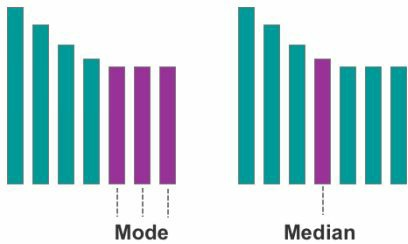

Figure 1: A visual example of the mode and median respectively

El segundo enfoque para gestionar los datos faltantes es aproximar los valores perdidos utilizando el valor medio, que adopta el valor (o valores) ubicado en el medio del conjunto de datos. Esto funciona mejor con números enteros y variables continuas (números con decimales).

Como último recurso, las filas con valores faltantes pueden eliminarse por completo. La desventaja obvia de este enfoque es tener menos datos para analizar y potencialmente obtener resultados menos completos.